In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def scrape_election_results(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    tables = soup.find_all('table')
    data = []

    for table in tables:
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            if len(cols) > 1:
                data.append([col.text.strip() for col in cols])

    df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])
    return df
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
df = scrape_election_results(url)
df.to_csv('lok_sabha_election_results_2024.csv', index=False)

### clean data

In [4]:
df['Won'] = pd.to_numeric(df['Won'], errors='coerce').fillna(0).astype(int)
df['Leading'] = pd.to_numeric(df['Leading'], errors='coerce').fillna(0).astype(int)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce').fillna(0).astype(int)
df.to_csv('cleaned_lok_sabha_election_results_2024.csv', index=False)

In [5]:
party_wins = df.groupby('Party')['Total'].sum().reset_index()

In [6]:
top_parties = party_wins.sort_values(by='Total', ascending=False).head(10)
top_parties.to_csv('top_10_parties.csv', index=False)

In [7]:
total_seats = df['Total'].sum()
party_wins['Percentage'] = (party_wins['Total'] / total_seats) * 100
max_seats_party = party_wins.loc[party_wins['Total'].idxmax()]
min_seats_party = party_wins.loc[party_wins['Total'].idxmin()]
average_seats_per_party = party_wins['Total'].mean()
num_parties_with_seats = party_wins[party_wins['Total'] > 0].shape[0]
independents = df[df['Party'].str.contains('Independent', case=False)]
total_independent_seats = independents['Total'].sum()

In [8]:
print(f"Total Seats: {total_seats}")
print(f"Number of Parties with at least one seat: {num_parties_with_seats}")
print(f"Total Seats won by Independent Candidates: {total_independent_seats}")
print(f"Party with Most Seats: {max_seats_party['Party']} ({max_seats_party['Total']} seats)")
print(f"Party with Fewest Seats: {min_seats_party['Party']} ({min_seats_party['Total']} seats)")
print(f"Average Seats per Party: {average_seats_per_party:.2f}")
print("Top 10 Parties by Seats Won:")
print(top_parties)

Total Seats: 543
Number of Parties with at least one seat: 42
Total Seats won by Independent Candidates: 7
Party with Most Seats: Bharatiya Janata Party - BJP (240 seats)
Party with Fewest Seats: AJSU Party - AJSUP (1 seats)
Average Seats per Party: 12.93
Top 10 Parties by Seats Won:
                                                Party  Total
8                        Bharatiya Janata Party - BJP    240
15                     Indian National Congress - INC     99
31                               Samajwadi Party - SP     37
4                 All India Trinamool Congress - AITC     29
12                    Dravida Munnetra Kazhagam - DMK     22
36                                 Telugu Desam - TDP     16
20                       Janata Dal  (United) - JD(U)     12
33     Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT      9
26  Nationalist Congress Party – Sharadchandra Paw...      8
34                                    Shiv Sena - SHS      7


### seats won by top 10 parties-Bar graph

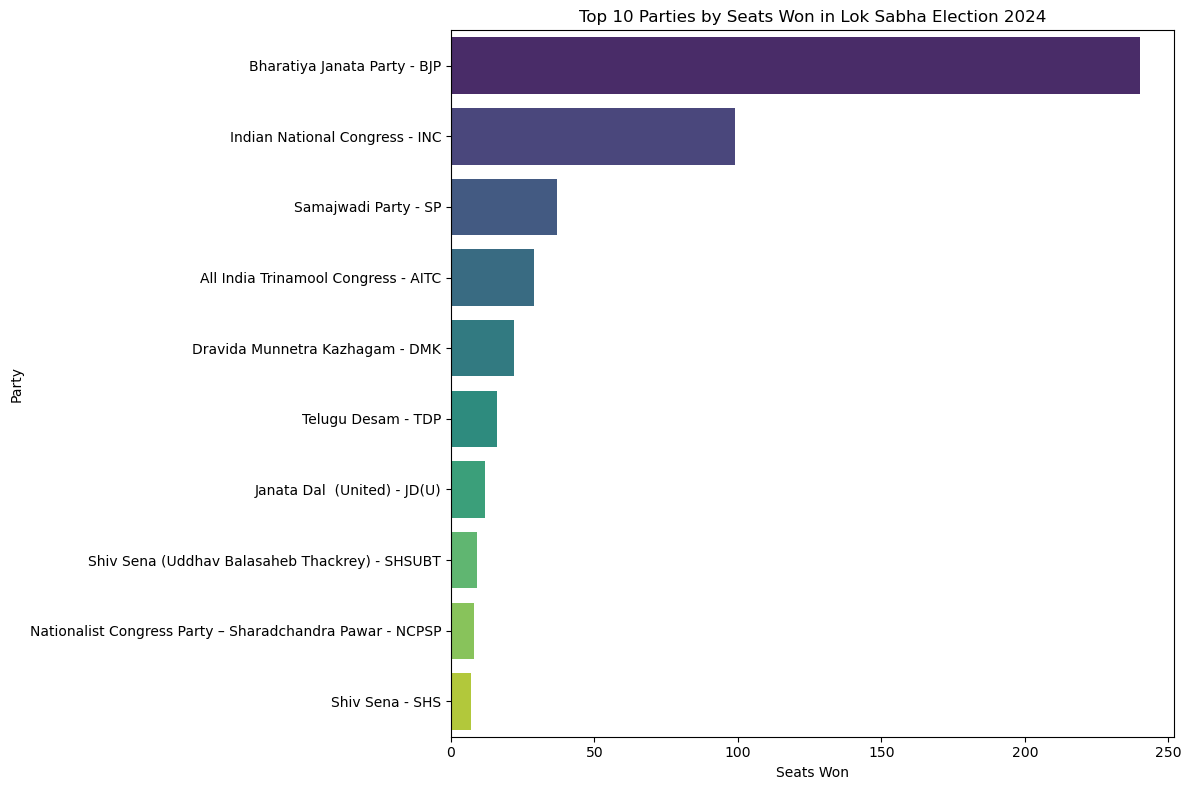

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Total', y='Party', data=top_parties, palette='viridis')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.title('Top 10 Parties by Seats Won in Lok Sabha Election 2024')
plt.tight_layout()
plt.savefig('top_10_parties.png')
plt.show()

### overall seat distribution - pie chart

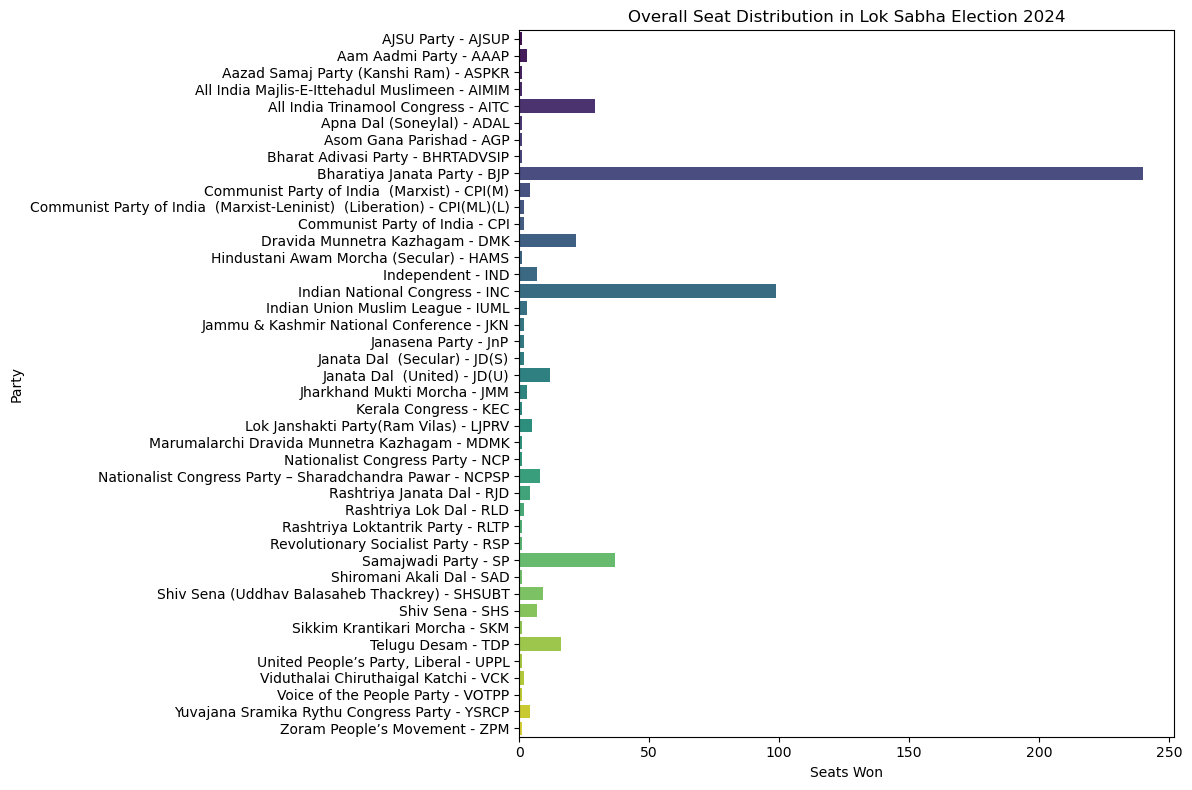

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Total', y='Party', data=party_wins, palette='viridis')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.title('Overall Seat Distribution in Lok Sabha Election 2024')
plt.tight_layout()
plt.savefig('overall_seat_distribution_horizontal.png')
plt.show()

In [11]:
df['Percentage'] = (df['Total'] / total_seats) * 100
top_parties['Percentage'] = (top_parties['Total'] / total_seats) * 100


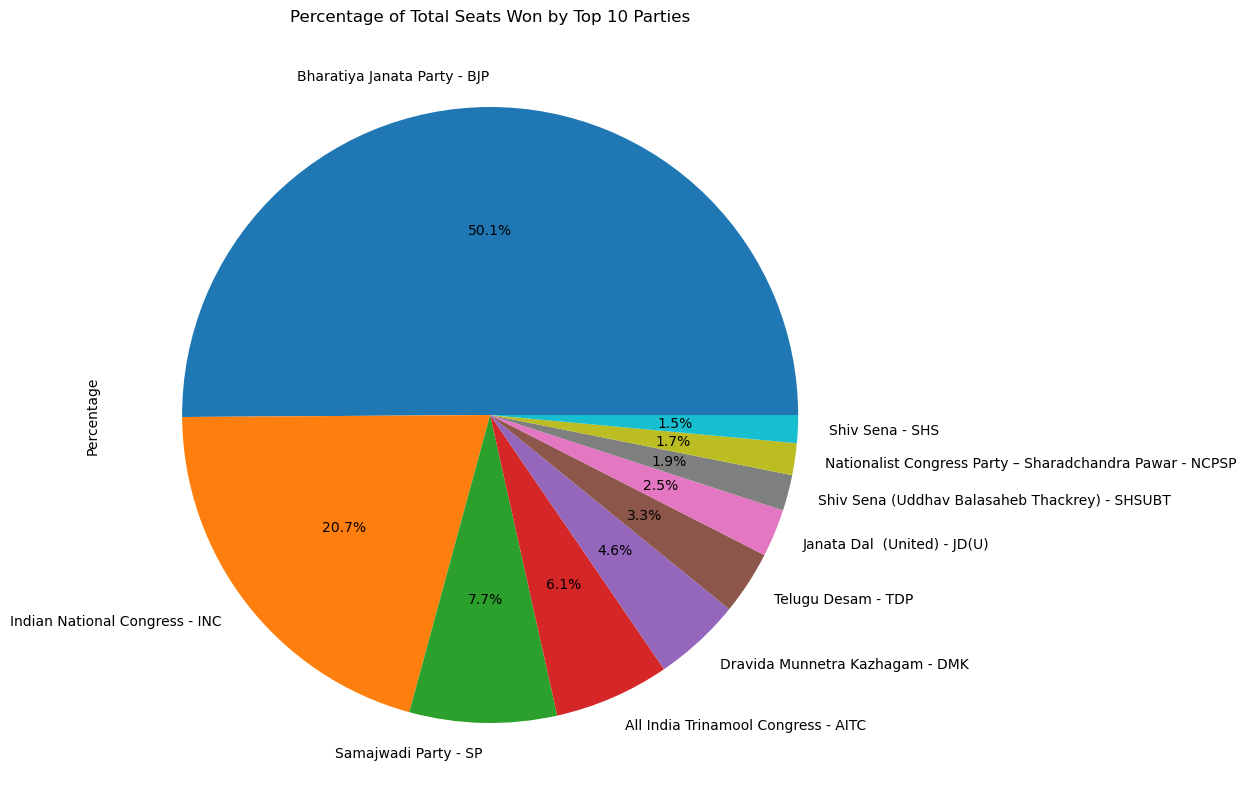

In [13]:
plt.figure(figsize=(12, 12))
top_parties.set_index('Party')['Percentage'].plot.pie(autopct='%1.1f%%', legend=False, figsize=(10, 10))
plt.title('Percentage of Total Seats Won by Top 10 Parties')
plt.savefig('top_10_parties_percentage.png')
plt.show()


In [15]:
second_most_seats_party = party_wins.sort_values(by='Total', ascending=False).iloc[1]
print(f"Second Most Seats: {second_most_seats_party['Party']} - {second_most_seats_party['Total']} seats")


Second Most Seats: Indian National Congress - INC - 99 seats


In [18]:
top_10_seats = top_parties['Total'].sum()
non_top_10_seats = total_seats - top_10_seats
non_top_10_percentage = (non_top_10_seats / total_seats) * 100
print(f"Percentage of Total Seats Held by Non-Top 10 Parties: {non_top_10_percentage:.2f}%")

Percentage of Total Seats Held by Non-Top 10 Parties: 11.79%
